In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 1) Identificar as variáveis com maior e menor poder discriminativo e as funções de densidade probabilidade class-condicional dessas variáveis

Highest discriminative power: degree_spondylolisthesis
Lowest discriminative power: pelvic_radius


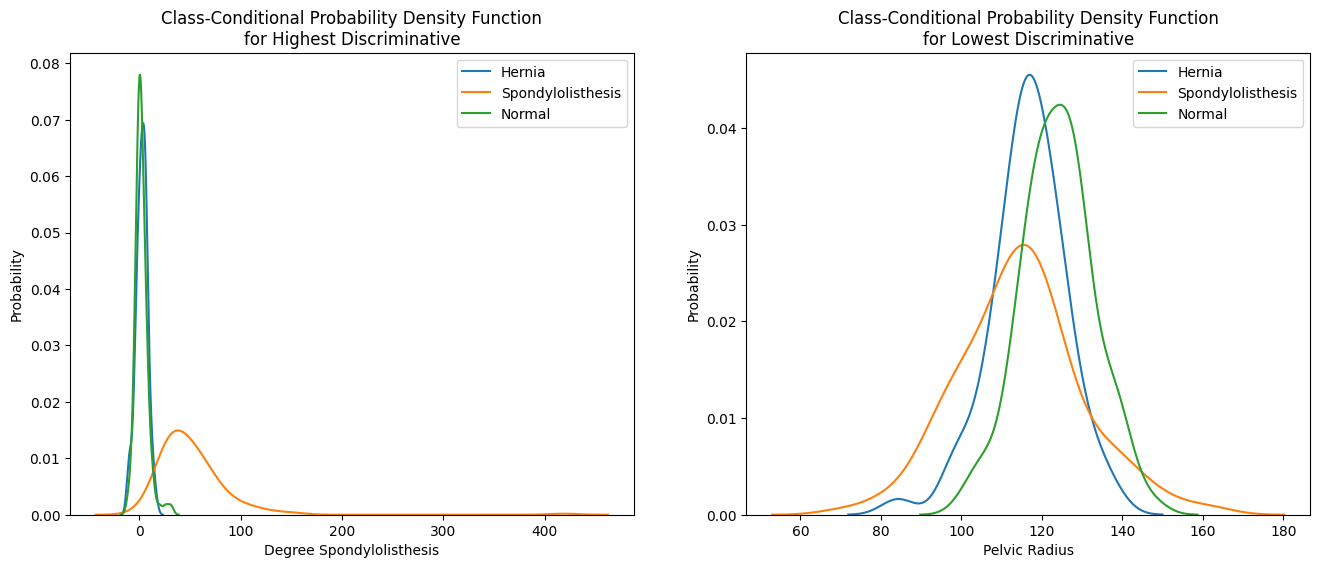

In [6]:
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# Read ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']

fimportance = f_classif(X, y)

# Create a DataFrame to store variable names, F-values, and p-values
values_df = pd.DataFrame({'Attribute': X.columns.values, 'F-Value': fimportance[0], 'P-Value': fimportance[1]})

# Identify the input variable with the highest and lowest discriminative power
highest_d = values_df['Attribute'][values_df['F-Value'].idxmax()]
lowest_d = values_df['Attribute'][values_df['F-Value'].idxmin()]
print(f'Highest discriminative power: {highest_d}')
print(f'Lowest discriminative power: {lowest_d}')


classes = df['class'].unique()
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
for cls in classes:
    sns.kdeplot(X[y == cls][highest_d], label= cls)
plt.title('Class-Conditional Probability Density Function\nfor Highest Discriminative')
plt.xlabel(highest_d.title().replace("_", " "))
plt.ylabel('Probability')
plt.legend()

plt.subplot(1, 2, 2)
for cls in classes:
    sns.kdeplot(X[y == cls][lowest_d], label= cls)
plt.title('Class-Conditional Probability Density Function\nfor Lowest Discriminative')
plt.xlabel(lowest_d.title().replace("_", " "))
plt.ylabel('Probability')
plt.legend()
plt.show()

# 2) Precisões de treinamento e teste da árvore de decisão com diferentes limites de profundidade

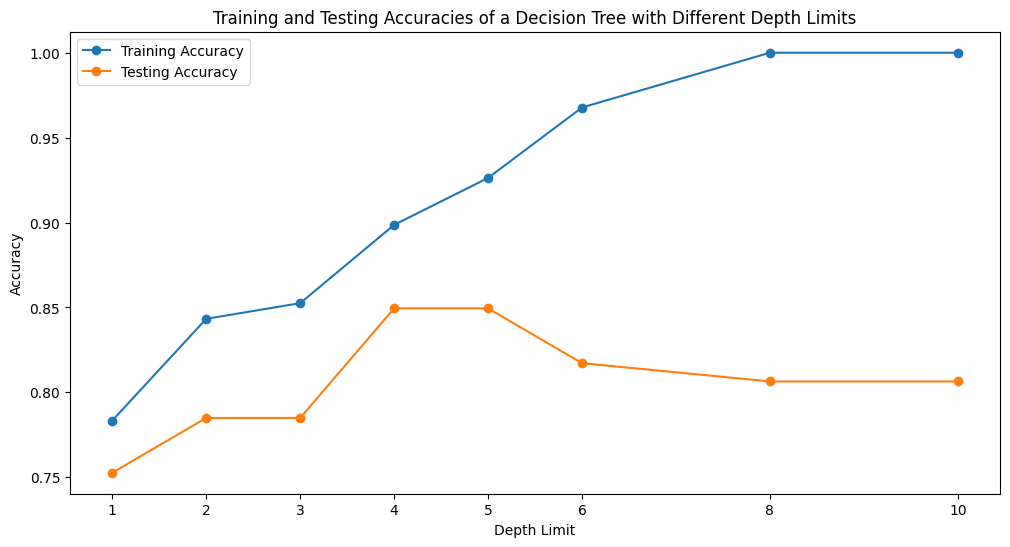

In [7]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

training_accuracies = []
testing_accuracies = []
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]
n_runs = 10

for depth_limit in depth_limits:
    train_sum = 0
    test_sum = 0
    
    for i in range(n_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)
        
        clf = tree.DecisionTreeClassifier(max_depth=depth_limit, random_state=0)
        clf.fit(X_train, y_train)
        
        train_sum += accuracy_score(y_train, clf.predict(X_train))
        test_sum += accuracy_score(y_test, clf.predict(X_test))
    
    # Calculate average accuracies for each depth limit
    avg_train_acc = train_sum / n_runs
    avg_test_acc = test_sum / n_runs
    
    training_accuracies.append(avg_train_acc)
    testing_accuracies.append(avg_test_acc)

plt.figure(figsize=(12, 6))
plt.plot(depth_limits, training_accuracies, label='Training Accuracy', marker='o')
plt.plot(depth_limits, testing_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracies of a Decision Tree with Different Depth Limits')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.xticks(depth_limits)
plt.legend()
plt.show()

# 3) Comentário sobre os resultados
À medida que a profundidade máxima da árvore aumenta, a precisão do treinamento também aumenta. No entanto, a precisão do teste começa a diminuir após um certo ponto. Isso sugere que, com uma profundidade máxima muito alta, o modelo produz árvores que superajustam os dados de treinamento, ou seja, captura o ruído nos dados de treinamento, em vez de aprender relações gerais que podem ser aplicadas a novos dados. Assim conclui-se que o modelo tem uma baixa capacidade de generalização.

# 4)
### i) Árvore de decisão

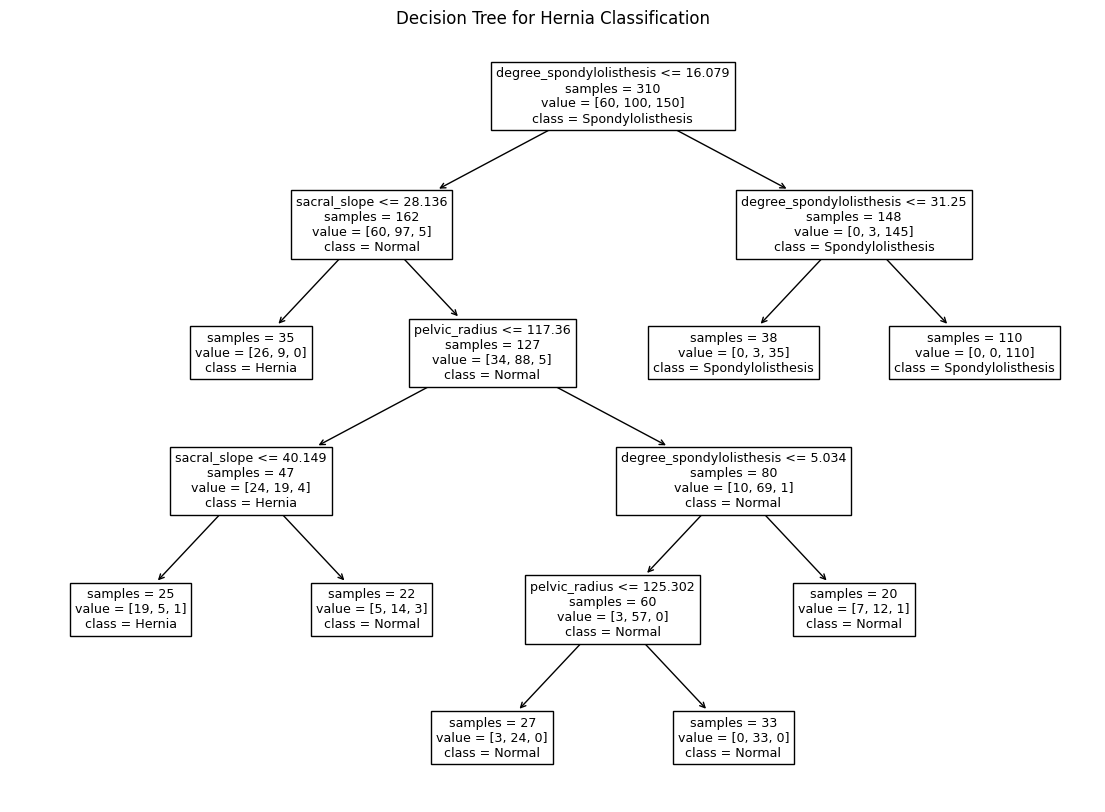

In [8]:
clf = tree.DecisionTreeClassifier(random_state=0, min_samples_leaf=20)
clf.fit(X, y)

plt.figure(figsize=(14, 10))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=clf.classes_.tolist(), impurity=False)
plt.title("Decision Tree for Hernia Classification")
plt.show()

### ii) Characterize a hernia condition by identifying the hernia-conditional associations.
answer...